In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
season=input("Enter Season: ")

Enter Season: spring


In [ ]:
file_path='/content/drive/MyDrive/CS_225/'+season+'_photos_data.csv'

In [ ]:
import pandas as pd
df = pd.read_csv(file_path)
df['latitude']=df['latitude'].round(decimals=5)
df['longitude']=df['longitude'].round(decimals=5)
df_latLong= df[["latitude","longitude"]]

In [ ]:
#DBSCAN Parameter Estimation (Elbow Method)
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
import numpy as np
coords = df_latLong.values
print(coords)
nbrs = NearestNeighbors(n_neighbors=4, algorithm='ball_tree',metric='haversine').fit(np.radians(coords))
distances, indices = nbrs.kneighbors(np.radians(coords))

[[  30.67096  -81.46077]
 [  33.9966  -118.3276 ]
 [  36.12432 -115.17154]
 ...
 [  42.36663  -83.46951]
 [  34.02348 -118.47822]
 [  47.59502 -122.33184]]


(35000.0, 32701.2)

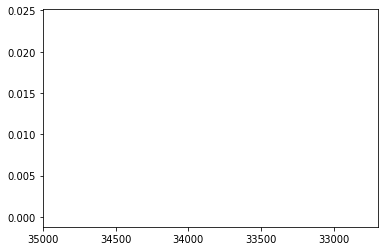

In [ ]:
#Visualize elbow
distances2 = np.sort(distances, axis=0)
distances2 = distances2[:,-1]
plt.plot(distances2)
plt.xlim(35000)

In [ ]:
!pip install reverse_geocoder
!pip install geopandas

In [ ]:
#DBSCAN Algorithm Implementation

import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
import geopandas
import reverse_geocoder as rg
from shapely.geometry import MultiPoint,Point

coords = df_latLong.values
kms_per_radian = 6371.0088 
epsilon = 63 / kms_per_radian 
db = DBSCAN(eps=epsilon, min_samples=4, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 34


In [ ]:
#Finding each cluster's convex_hull and total number of photos
clusters=clusters[:-1]
num_clusters=len(clusters)
c_h=[]
point_column=[]
num_photos=[]
for index, value in clusters.items():
  tuples=[]
  for i in value:
    tuples.append((i[0],i[1]))
  points = MultiPoint(tuples)
  point_column.append(points)
  c_h.append(points.convex_hull)
  num_photos.append(len(value))

In [ ]:
#Saving the cluster's information in a Pandas GeoDataFrame
import geopandas
gdf = geopandas.GeoDataFrame(geometry=c_h)
gdf['num_photos']=num_photos
gdf['area']=gdf.area
t_p=gdf['num_photos'].sum()
gdf['photo_factor']=gdf['num_photos'].div(t_p)
gdf

,geometry,num_photos,area,photo_factor
0,"POLYGON ((30.814 -85.228, 29.988 -85.014, 24.7...",2687,1.899960e+01,0.066288
1,"POLYGON ((48.022 -124.683, 42.836 -124.563, 40...",19849,1.460505e+02,0.489676
2,"POLYGON ((41.910 -87.635, 34.838 -87.635, 33.2...",17225,2.230807e+02,0.424941
3,"POLYGON ((30.272 -87.595, 30.272 -87.595, 29.9...",126,1.026481e+00,0.003108
4,"POLYGON ((33.519 -79.098, 33.509 -79.068, 33.5...",81,3.640843e-01,0.001998
5,"POLYGON ((37.433 -115.446, 37.359 -115.167, 37...",5,7.427000e-07,0.000123
6,"POLYGON ((32.440 -81.773, 31.958 -81.321, 31.9...",145,1.039778e+00,0.003577
7,"POLYGON ((43.549 -119.086, 42.662 -118.899, 41...",72,4.736672e-01,0.001776
8,"POLYGON ((39.280 -114.973, 39.267 -114.953, 39...",22,3.856203e-02,0.000543
9,"POLYGON ((26.614 -77.022, 26.538 -76.962, 26.5...",6,1.530337e-04,0.000148


In [ ]:
# Naming each cluster based on the centroid location and reverse geo-coded location
centroids=gdf.centroid
gdf['centroid']= centroids
import reverse_geocoder as rg
coords=[]
rep=[]
east=0
west=0
for index, value in centroids.items():
    coords.append((value.x,value.y))
    if value.y<-100:
      west+=1
    else:
      east+=1
    rev_geo=rg.search((value.x,value.y))
    rep.append(rev_geo[0]['name']+','+rev_geo[0]['admin1'])
gdf['cluster_name']=rep

In [ ]:
# Each User's Location History from the photos data
user_dict_initial={}
for i in range(len(df)) :
  user_name=df.loc[i,"ownername"]
  lat=df.loc[i, "latitude"]
  longg=df.loc[i, "longitude"]
  if user_name in user_dict_initial:
    user_dict_initial[user_name].append((lat,longg))
  else:
    user_dict_initial[user_name]=[(lat,longg)]

#Filter out some users based on the threshold of number of photos taken.
updated_users={}
for key in user_dict_initial:
  if len(user_dict_initial[key])>20:
    updated_users[key]=user_dict_initial[key]

user_dict={}
for i in updated_users:
  user_dict[i]=MultiPoint(updated_users[i])

# Saved User's location information in a Dataframe
user_gdf={'user_name':[],'geometry':[]}
for key in user_dict:
  user_gdf['user_name'].append(key)
  user_gdf['geometry'].append(user_dict[key])

user_df= geopandas.GeoDataFrame(user_gdf)

In [ ]:
# Prepare User-Cluster Matrix for Collaborative Filtering
import numpy as np
user_mat=np.zeros((len(user_df),num_clusters))

for i in range(len(user_df)):
  user_locations=user_df.loc[i,'geometry']

  for j in range(len(gdf)):
    cluster_geom=gdf.loc[j,'geometry']
    if user_locations.intersects(cluster_geom):
      user_mat[i][j]+=1
  

In [ ]:
# Matrix Factorization (MF) Based Collaborative Filtering Model

import numpy as np

class MF():

    def __init__(self, R, K, alpha, beta, iterations):
        """
        Perform matrix factorization to predict empty
        entries in a matrix.

        Arguments
        - R (ndarray)   : user-item rating matrix
        - K (int)       : number of latent dimensions
        - alpha (float) : learning rate
        - beta (float)  : regularization parameter
        """

        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    def train(self):
        # Initialize user and item latent feature matrice
        

        self.P = np.random.uniform(low=0,high=1, size=(self.num_users, self.K))
        self.Q = np.random.uniform(low=0,high=1, size=(self.num_items, self.K))

        # Initialize the biases
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])

        # Create a list of training samples
        self.samples = [
            (i, j, self.R[i, j])
            for i in range(self.num_users)
            for j in range(self.num_items)
            if self.R[i, j] > 0
        ]

        # Perform stochastic gradient descent for number of iterations
        training_process = []
        iter_x=[]
        error_y=[]
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
            if (i+1) % 100 == 0:
                print("Iteration: %d ; error = %.4f" % (i+1, mse))
                iter_x.append(i+1)
                error_y.append(mse)

        plt.plot(iter_x, error_y )
        plt.ylabel("Mean Squared Error")
        plt.xlabel("Number of Iterations")
        plt.show()
        return training_process

    def mse(self):
        """
        A function to compute the total mean square error
        """
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    def sgd(self):
        """
        Perform stochastic graident descent
        """
        for i, j, r in self.samples:
            # Computer prediction and error
            prediction = self.get_rating(i, j)
            e = (r - prediction)

            # Update biases
            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i]) 
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            # Update user and item latent feature matrices
            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    def get_rating(self, i, j):
        """
        Get the predicted rating of user i and item j
        """
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    def full_matrix(self):
        """
        Computer the full matrix using the resultant biases, P and Q
        """
        return self.b + self.b_u[:,np.newaxis] + self.b_i[np.newaxis:,] + self.P.dot(self.Q.T)

Iteration: 10 ; error = 0.4759
Iteration: 20 ; error = 0.2484
Iteration: 30 ; error = 0.1619
Iteration: 40 ; error = 0.1146
Iteration: 50 ; error = 0.0870
Iteration: 60 ; error = 0.0693
Iteration: 70 ; error = 0.0571
Iteration: 80 ; error = 0.0477
Iteration: 90 ; error = 0.0411
Iteration: 100 ; error = 0.0375
Iteration: 110 ; error = 0.0331
Iteration: 120 ; error = 0.0302
Iteration: 130 ; error = 0.0331
Iteration: 140 ; error = 0.0271
Iteration: 150 ; error = 0.0252
Iteration: 160 ; error = 0.0232
Iteration: 170 ; error = 0.0218
Iteration: 180 ; error = 0.0207
Iteration: 190 ; error = 0.0196
Iteration: 200 ; error = 0.0189
Iteration: 210 ; error = 0.0185
Iteration: 220 ; error = 0.0173
Iteration: 230 ; error = 0.0172
Iteration: 240 ; error = 0.0162
Iteration: 250 ; error = 0.0155
Iteration: 260 ; error = 0.0166
Iteration: 270 ; error = 0.0142
Iteration: 280 ; error = 0.0138
Iteration: 290 ; error = 0.0131
Iteration: 300 ; error = 0.0128
Iteration: 310 ; error = 0.0123
Iteration: 320 ; 

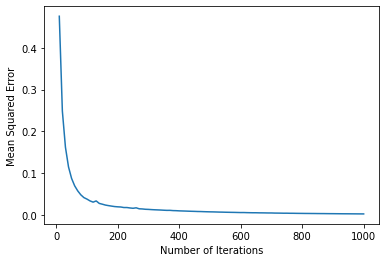

In [ ]:
#Train the user-cluster matrix and Validation

mf = MF(user_mat, K=5, alpha=0.1, beta=0.01, iterations=1000)
training_process = mf.train()
pq=mf.full_matrix()
final=pd.DataFrame(pq)


In [ ]:
l=np.where(user_mat[0]==1)[0]
np.setdiff1d(l, np.array(0))

array([41, 67])

In [ ]:
# Processing Final Recommendation

row_no=pq.shape[0]
col_no=pq.shape[1]

for i in range(row_no):
  for j in range(col_no):
    pq[i][j]+=gdf.loc[j,'photo_factor']

lat_list=[]
long_list=[]
name_list=[]
for i in range(len(gdf)):
  cent=gdf.loc[i,'centroid']
  lat_list.append(cent.x)
  long_list.append(cent.y)
  name_list.append(gdf.loc[i,'cluster_name'])

recommend_top={'cluster_center_latitude':lat_list,'cluster_center_longitude':long_list,
               'cluster_name':name_list}


cluster_analytics={}

for i in range(row_no):
  #top_ten_cluster=np.flip(np.argsort(pq[i]))[0:10]
  des=np.flip(np.argsort(pq[i]))
  li=np.where(user_mat[i]==1)[0]
  top_ten_cluster= np.setdiff1d(des,li)[0:10]
  for key in top_ten_cluster:
    if key not in cluster_analytics:
      cluster_analytics[key]=1
    else:
      cluster_analytics[key]+=1

  l=[]
  recommend_top[user_df.loc[i,'user_name']]=[0]*len(gdf)
  for item in top_ten_cluster:
    recommend_top[user_df.loc[i,'user_name']][item]=1

    


In [ ]:
recommend_df= pd.DataFrame.from_dict(recommend_top)
recommend_df

,cluster_center_latitude,cluster_center_longitude,cluster_name,PistolPete13,RobHelfman,MrMontreal66 Productions,altadena_eric,kmurf,Rawbert A. Wagner,drum118,cseeman,KOSAPC2,ianhun2009,dandysue13,Dr. Warner,wacamerabuff,HorsePunchKid,photos-by-sherm,johnjmurphyiii,rozoneill,CRMRA,happy_hounds,Don't Mess With Jim,eDeaver Photography,PINOY PHOTOGRAPHER,Miki Badt,France Hopper,earthdog,Michael C Meyer,Thomas Hawk,csm10495,Malcolm Slaney,Sistertommie,Street x Street,KAP Cris,treegrow,GMLSKIS,haydenschiff,Jim Osdale,R. Kurmann,...,ScrippsGraduateProgram,Tip - Click Albums then View Collection,Piedmont Fossil,yunckette,J. David Buerk,Maria Eklind,David441491,some.dude,Kissimmee Utility Authority,openspacer,MKHNaturalist,Kzoo Cowboy,James Scott S,Elinor2650,NASA HQ PHOTO,ussiwojima,Susan Dennis,aking1,archifishal,Michael G. Baron,Norwescon,stephenyeargin,Miguel Discart (Photos Vrac),avp2013,JimFleenor,mrusc96,Arthur Windsor - Florida Wildlife,Adam Cooperstein,KseniyaPhotography +1-347-829-4710,suchentai,Pythaglio,AndyNoise.Com,Vinny Schiano,Gamma Man,Reggie Martell,devils4ever,aliceinwl1,Yihang (Rain) Li,torontomanblog,dym75
0,28.513721,-82.212273,"Ridge Manor,Florida",0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,0,1,1,1,0,1,0,1,1,1,1,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1
1,41.539486,-118.962617,"Winnemucca,Nevada",1,0,1,0,0,0,0,1,1,1,1,0,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,...,0,0,1,0,1,1,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,1,0,0,1,1
2,40.623250,-79.249295,"Indiana,Pennsylvania",0,1,0,1,1,1,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,0,1,1,0,0,0,1,1,1,1,0,1,0,1,1,...,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,1,1,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0
3,30.417830,-86.714695,"Mary Esther,Florida",1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,33.890771,-78.482595,"Sunset Beach,North Carolina",1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,37.383837,-115.260177,"Alamo,Nevada",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,32.467925,-80.783703,"Laurel Bay,South Carolina",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,42.613902,-118.692596,"Hines,Oregon",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,39.187292,-114.663300,"Ely,Nevada",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,26.562863,-76.980353,"Marsh Harbour,Central Abaco",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
recommend_df.to_csv('spring_recommend.csv')

In [ ]:
cluster_analytics

{0: 368,
 1: 224,
 2: 347,
 3: 256,
 4: 307,
 5: 368,
 6: 368,
 7: 352,
 8: 369,
 9: 369,
 10: 302,
 11: 58,
 12: 12}

In [ ]:
for i in range(len(gdf)):
  print(i,':', gdf.loc[i,'cluster_name'],end=', ')
choices=input()
idx= choices.split(',')
idx

0 : Williamsburg,Kentucky, 1 : London,California, 2 : Oakville,Ontario, 3 : Hampton,New Jersey, 4 : Venersborg,Washington, 5 : Fairmont,North Carolina, 6 : Gate City,Virginia, 7 : Henderson,Nevada, 8 : Mary Esther,Florida, 9 : Key West,Florida, 10 : Pincourt,Quebec, 11 : Waterford,Michigan, 12 : Polk City,Florida, 13 : Villages of Oriole,Florida, 14 : Mountain City,Georgia, 15 : New Miami,Ohio, 16 : Palm Valley,Florida, 17 : Deer Park,Washington, 18 : Burns Harbor,Indiana, 19 : Haw River,North Carolina, 20 : Richmond,Virginia, 21 : Two Rivers,Wisconsin, 22 : Southport,Indiana, 23 : Shively,Kentucky, 24 : Kettle Falls,Washington, 25 : Sault Ste. Marie,Michigan, 26 : Forks,Washington, 27 : Deschutes River Woods,Oregon, 28 : Bar Harbor,Maine, 29 : Medina,Ohio, 30 : Delphos,Ohio, 31 : Oak Hill,Tennessee, 32 : Thunderbolt,Georgia, 33 : Redway,California, 34 : Lovelock,Nevada, 35 : West Homestead,Pennsylvania, 36 : Elko,Nevada, 37 : Harveys Lake,Pennsylvania, 38 : Midland,North Carolina, 39 

['1', '5', '6']

In [ ]:
from scipy import spatial


user_input=input("Enter User Name:")
user_index=-1


for i in range(len(user_df)):
  if user_df.loc[i,'user_name']==user_input:
    user_index=i
    break

if user_index==-1: #new user, assign user_index using cosine similarity
  print("New user : Choose preferences from the options below: ")
  for i in range(len(gdf)):
    print(i,':', gdf.loc[i,'cluster_name'],end=', ')
  choices=input()
  idx= choices.split(',')
  new_user_entry= np.zeros(num_clusters)
  for item in idx:
    new_user_entry[int(item)]=1.0
  sim=[]
  for i in range(len(user_mat)):
    sim.append(1 - spatial.distance.cosine(new_user_entry, user_mat[i]))
  user_index=sim.index(max(sim))
  print("Found most similarity with user_name: ", user_df.loc[user_index,'user_name'])

print("Top 10 Recommended Places: ")
recommended=np.flip(np.argsort(pq[user_index]))[0:10]
for idx in recommended:
  print(gdf.loc[idx,'cluster_name'])

Enter User Name:tmt
New user: Choose preferences from the options below: 
0 : Williamsburg,Kentucky, 1 : London,California, 2 : Oakville,Ontario, 3 : Hampton,New Jersey, 4 : Venersborg,Washington, 5 : Fairmont,North Carolina, 6 : Gate City,Virginia, 7 : Henderson,Nevada, 8 : Mary Esther,Florida, 9 : Key West,Florida, 10 : Pincourt,Quebec, 11 : Waterford,Michigan, 12 : Polk City,Florida, 13 : Villages of Oriole,Florida, 14 : Mountain City,Georgia, 15 : New Miami,Ohio, 16 : Palm Valley,Florida, 17 : Deer Park,Washington, 18 : Burns Harbor,Indiana, 19 : Haw River,North Carolina, 20 : Richmond,Virginia, 21 : Two Rivers,Wisconsin, 22 : Southport,Indiana, 23 : Shively,Kentucky, 24 : Kettle Falls,Washington, 25 : Sault Ste. Marie,Michigan, 26 : Forks,Washington, 27 : Deschutes River Woods,Oregon, 28 : Bar Harbor,Maine, 29 : Medina,Ohio, 30 : Delphos,Ohio, 31 : Oak Hill,Tennessee, 32 : Thunderbolt,Georgia, 33 : Redway,California, 34 : Lovelock,Nevada, 35 : West Homestead,Pennsylvania, 36 : Elk

In [ ]:
sort_orders = sorted(cluster_analytics.items(), key=lambda x: x[1], reverse=True)
sort_orders=sort_orders[0:20]
lat_list=[]
long_list=[]
for item in sort_orders:
  c=gdf.loc[item[0],'centroid']
  lat_list.append(c.x)
  long_list.append(c.y)

In [ ]:
d={'lat':lat_list,'long':long_list}
import pandas as pd
ll=pd.DataFrame(d)
ll.to_csv('fall_see.csv')

'Redway,California'